# Data_description

Dieses Notebook fasst die Datenbeschreibung zusammen und bereitet die Daten für die programmatische Verarbeitung vor.

In [9]:
!pip install pandas

You should consider upgrading via the 'C:\Users\eldin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [16]:
!pip install matplotlib
!pip install scikit-learn
!pip install openpyxl

You should consider upgrading via the 'C:\Users\eldin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\eldin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 250.9/250.9 KB 5.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\eldin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [17]:
import pandas as pd

df = pd.read_excel('Datensätze.xlsx')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## 1. Zielvariable
Ich habe den Schlusskurs (`close`) als Zielvariable für zukünftige Vorhersagen gewählt.

In [24]:
# Zielvariable auswählen
target = 'close'

## 2. Statistische Kennwerte
Berechnung für Median und Standardabweichung für die Felder `open`, `high`, `low`, `close` und `volume`.

In [25]:
stats = df[['open', 'high', 'low', 'close', 'volume']].agg(['median', 'std']).T
stats.columns = ['Median', 'Standardabweichung']
stats

,Median,Standardabweichung
open,62.59,9.737877e+01
high,63.15,9.820752e+01
low,62.02,9.650742e+01
close,62.62,9.738975e+01
volume,2082093.50,8.693610e+06


## 3. Grafische Darstellung

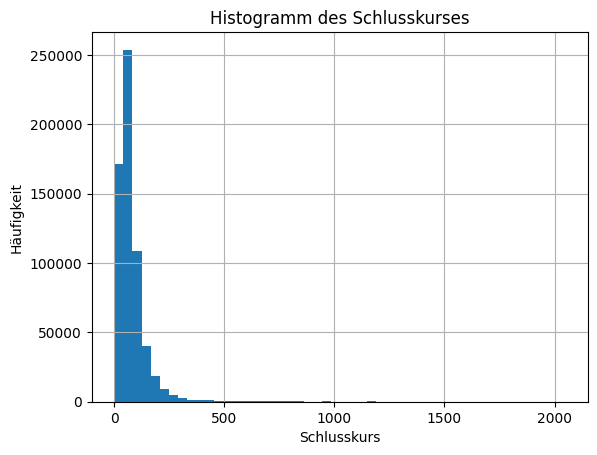

In [26]:
import matplotlib.pyplot as plt

# Histogramm des Schlusskurses
df['close'].hist(bins=50)
plt.title('Histogramm des Schlusskurses')
plt.xlabel('Schlusskurs')
plt.ylabel('Häufigkeit')
plt.show()

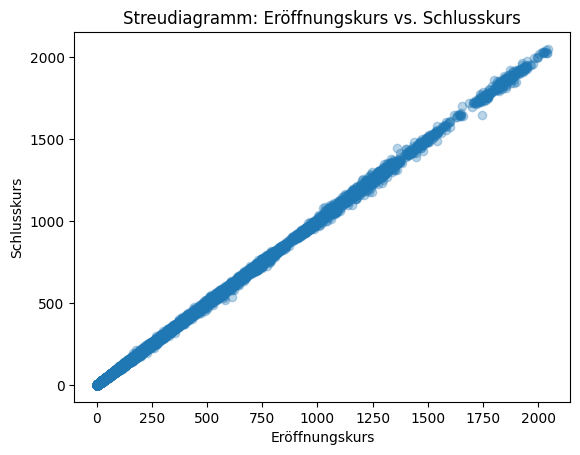

In [27]:
# Streudiagramm: Eröffnungskurs vs. Schlusskurs
plt.scatter(df['open'], df['close'], alpha=0.3)
plt.title('Streudiagramm: Eröffnungskurs vs. Schlusskurs')
plt.xlabel('Eröffnungskurs')
plt.ylabel('Schlusskurs')
plt.show()

## 4. Skalierung
Skaliere das Feld `volume` oder argumentiere, warum keine Skalierung nötig ist.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['volume_scaled'] = scaler.fit_transform(df[['volume']])
df[['volume', 'volume_scaled']].head()

,volume,volume_scaled
0,8407500,0.469964
1,8882000,0.524544
2,8126000,0.437583
3,10259500,0.682994
4,31879900,3.169926


**Erläuterung zur Skalierung:**

Ich habe das Feld `volume` skaliert, da es im Vergleich zu den Kursdaten sehr grosse Werte annimmt und somit die Modelloptimierung beeinflussen könnte. Eine Standardisierung auf Mittelwert 0 und Standardabweichung 1 stellt sicher, dass alle Features vergleichbare Wertebereiche besitzen und keine Feature-Dominanz entsteht. Ohne Skalierung würden hohe Volumina die Trainingsverfahren verzerren.